In [42]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [43]:
from fastai.vision import *
from fastai.metrics import error_rate

In [44]:
bs = 64

In [46]:
path = Path('../../challenges/1')
path

PosixPath('../../challenges/1')

In [47]:
path_img = path/'images'

In [48]:
path.ls()

[PosixPath('../../challenges/1/images'),
 PosixPath('../../challenges/1/annotations')]

In [49]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('../../challenges/1/images/Normal_341.png'),
 PosixPath('../../challenges/1/images/Normal_144.png'),
 PosixPath('../../challenges/1/images/Normal_151.png'),
 PosixPath('../../challenges/1/images/Normal_347.png'),
 PosixPath('../../challenges/1/images/Normal_223.png')]

In [50]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [52]:
data = ImageDataBunch.from_name_re(
            path_img,
            fnames,
            pat,
            ds_tfms=get_transforms(),
            size=365,
            bs=bs
        ).normalize(imagenet_stats)

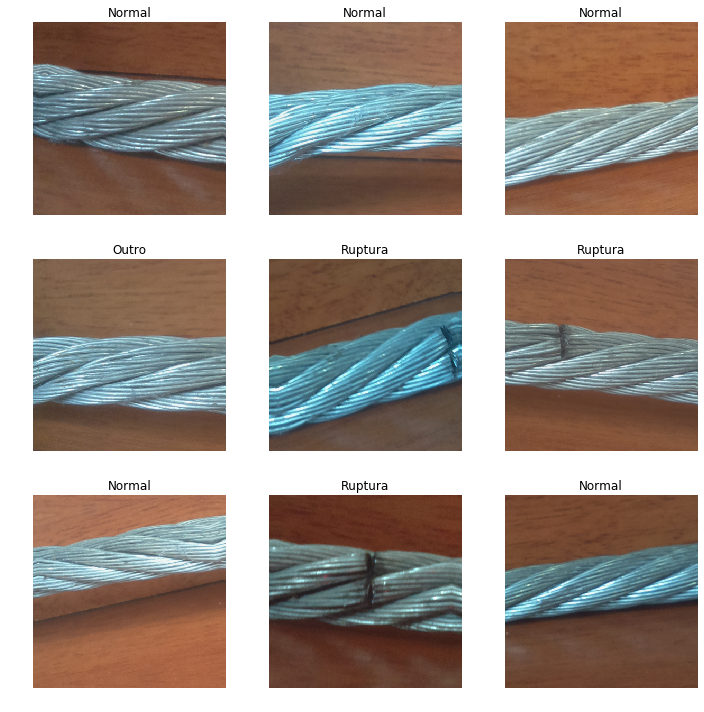

In [55]:
data.show_batch(rows=3, figsize=(10,10))

In [57]:
print(data.classes)
len(data.classes)
data.c

['Normal', 'Outro', 'Ruptura']


3

In [58]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [59]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.509984,0.889053,0.301370,02:08
1,1.247552,0.759688,0.301370,02:11
2,1.108024,0.654653,0.246575,02:15
3,0.989797,0.672429,0.287671,02:09


In [61]:
learn.save('stage-1')

In [62]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

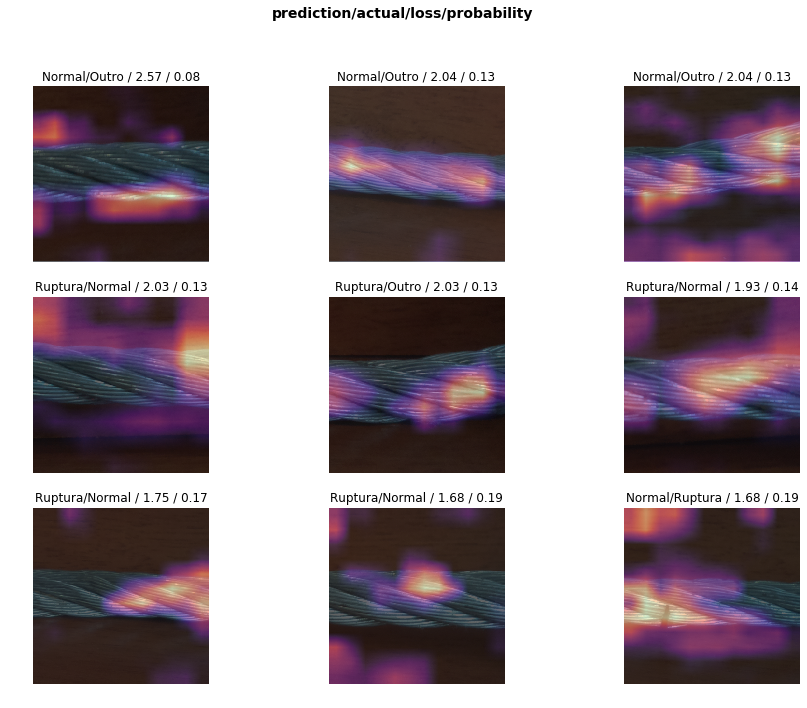

In [63]:
interp.plot_top_losses(9, figsize=(15,11))

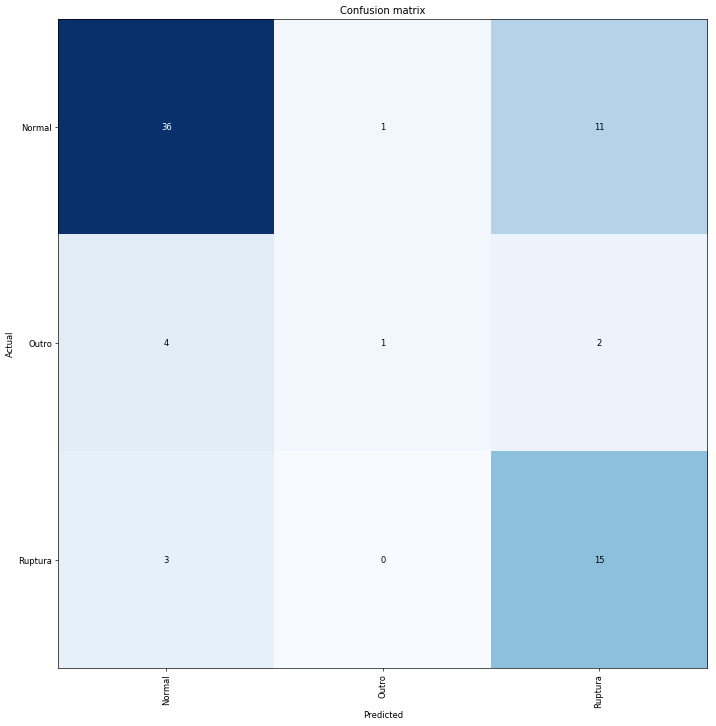

In [64]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [65]:
interp.most_confused(min_val=2)

[('Normal', 'Ruptura', 11),
 ('Outro', 'Normal', 4),
 ('Ruptura', 'Normal', 3),
 ('Outro', 'Ruptura', 2)]